In [1]:
import os

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI

QI_URL = os.getenv('QI_URL', 'https://api.quantum-inspire.com/')
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
from qiskit.visualization import plot_histogram

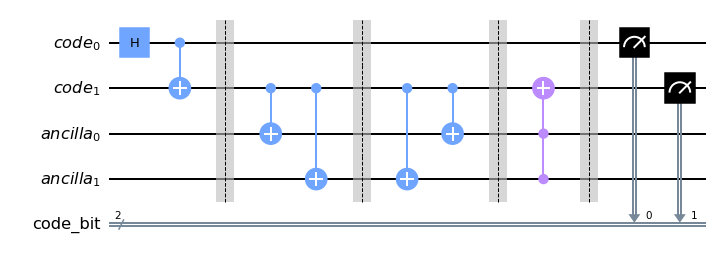

In [15]:
cq = QuantumRegister(2,'code')

aq = QuantumRegister(2,'ancilla')
cb = ClassicalRegister(2,'code_bit')
qc = QuantumCircuit(cq,aq,cb)
#Create EPR Pair
qc.h(cq[0])
qc.cx(cq[0],cq[1])
qc.barrier()
#Encoding Matrix U
qc.cx(cq[1],aq[0])
qc.cx(cq[1],aq[1])

# qc.x(cq[0]) #Bit flip Error
# qc.x(cq[1])
# qc.x(cq[0])
#Decoding matrix
qc.barrier()
qc.cx(cq[1],aq[1])
qc.cx(cq[1],aq[0])
qc.barrier()
qc.ccx(aq[0],aq[1],cq[1])#correction
qc.barrier()


qc.measure(cq,cb)
qc.draw(output='mpl')

In [10]:
authentication = get_authentication()
QI.set_authentication(authentication, QI_URL)

Enter email:


 kunduneelkanth@gmail.com


Enter password


 ········


Generated histogram:


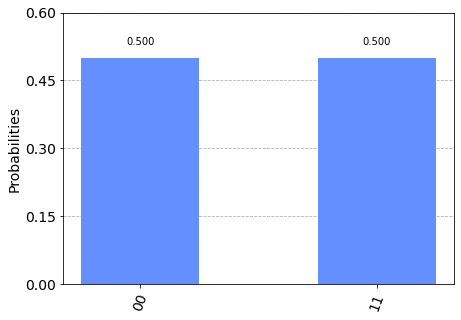

In [35]:
backend = Aer.get_backend('qasm_simulator')
j=execute(qc, backend=backend, shots=1024)
result = j.result()
print('Generated histogram:')
plot_histogram(result.get_counts())

Generated histogram:


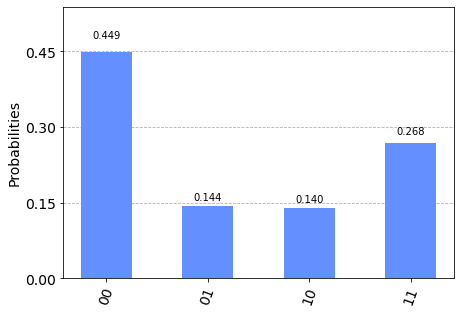

In [17]:
#QuTech backend simulator
qi_backend = QI.get_backend('Starmon-5')
j=execute(qc, backend=qi_backend, shots=1024)
result = j.result()
print('Generated histogram:')
plot_histogram(result.get_counts())

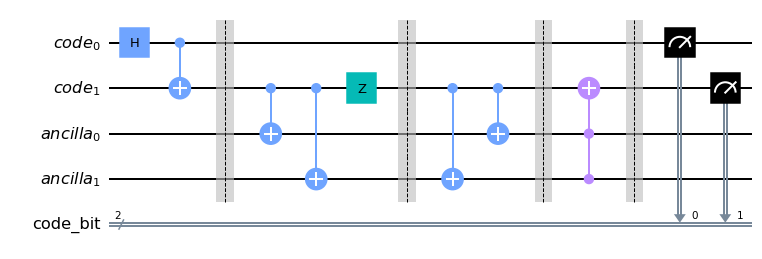

In [29]:
#Pauli-Z Error in Memory
cq = QuantumRegister(2,'code')

aq = QuantumRegister(2,'ancilla')
cb = ClassicalRegister(2,'code_bit')
qc1 = QuantumCircuit(cq,aq,cb)
#Create EPR Pair
qc1.h(cq[0])
qc1.cx(cq[0],cq[1])
qc1.barrier()
#Encoding Matrix U
qc1.cx(cq[1],aq[0])
qc1.cx(cq[1],aq[1])


qc1.z(cq[1]) # Pauli-Z error in memeory

qc1.barrier()
qc1.cx(cq[1],aq[1])
qc1.cx(cq[1],aq[0])
qc1.barrier()
qc1.ccx(aq[0],aq[1],cq[1])#correction
qc1.barrier()


qc1.measure(cq,cb)
qc1.draw(output='mpl')

Generated histogram:


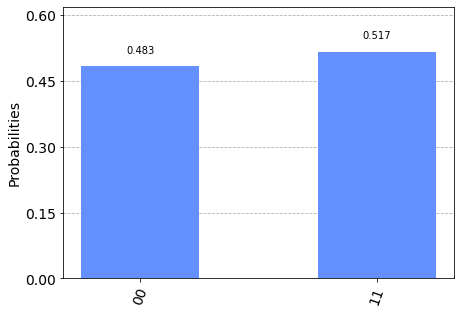

In [41]:
backend = Aer.get_backend('qasm_simulator')
job_qc1=execute(qc1, backend=backend, shots=1024)
result_qc1 = job_qc1.result()
print('Generated histogram:')
plot_histogram(result_qc1.get_counts())

Generated histogram:


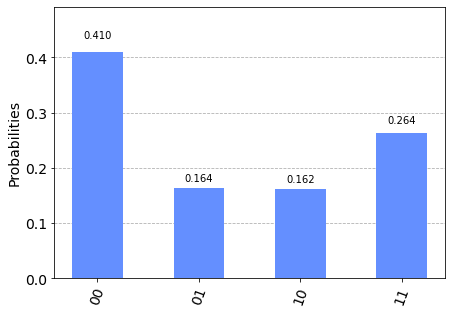

In [31]:
#QuTech backend simulator
qi_backend = QI.get_backend('Starmon-5')
job_qc1=execute(qc1, backend=qi_backend, shots=1024)
result_qc1 = job_qc1.result()
print('Generated histogram:')
plot_histogram(result_qc1.get_counts())

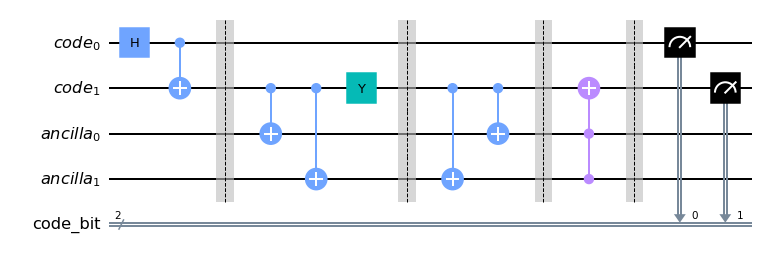

In [32]:
#Pauli-Y Error
cq = QuantumRegister(2,'code')

aq = QuantumRegister(2,'ancilla')
cb = ClassicalRegister(2,'code_bit')
qc2 = QuantumCircuit(cq,aq,cb)
#Create EPR Pair
qc2.h(cq[0])
qc2.cx(cq[0],cq[1])
qc2.barrier()
#Encoding Matrix U
qc2.cx(cq[1],aq[0])
qc2.cx(cq[1],aq[1])


qc2.y(cq[1])

#Decoding matrix
qc2.barrier()
qc2.cx(cq[1],aq[1])
qc2.cx(cq[1],aq[0])
qc2.barrier()
qc2.ccx(aq[0],aq[1],cq[1])#correction
qc2.barrier()


qc2.measure(cq,cb)
qc2.draw(output='mpl')

Generated histogram:


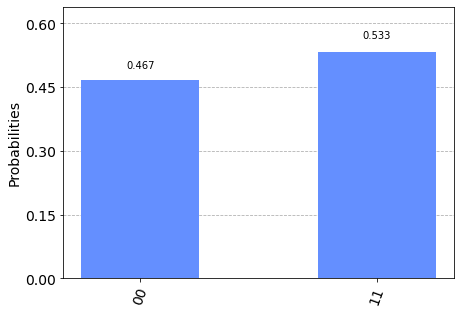

In [40]:
#QASM backend
backend = Aer.get_backend('qasm_simulator')
job_qc2=execute(qc2, backend=backend, shots=1024)
result_qc2 = job_qc2.result()
print('Generated histogram:')
plot_histogram(result_qc2.get_counts())

Generated histogram:


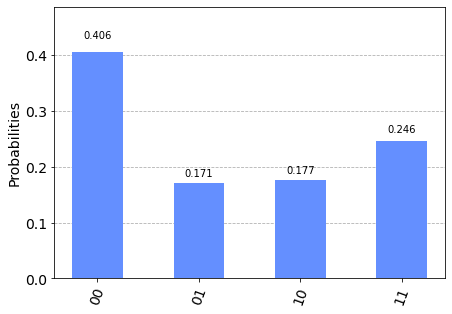

In [39]:
#QuTech backend simulator
qi_backend = QI.get_backend('Starmon-5')
job_qc2=execute(qc2, backend=qi_backend, shots=1024)
result_qc2 = job_qc2.result()
print('Generated histogram:')
plot_histogram(result_qc2.get_counts())

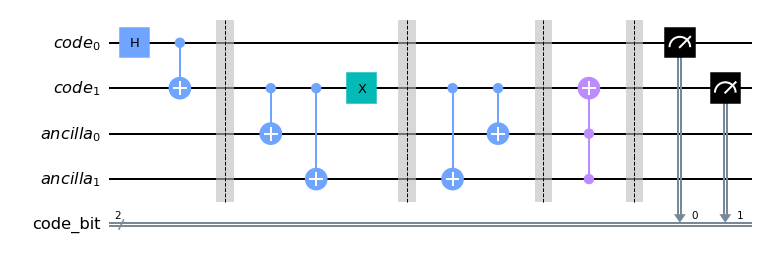

In [36]:
#Pauli-X Error

cq = QuantumRegister(2,'code')

aq = QuantumRegister(2,'ancilla')
cb = ClassicalRegister(2,'code_bit')
qc3 = QuantumCircuit(cq,aq,cb)
#Create EPR Pair
qc3.h(cq[0])
qc3.cx(cq[0],cq[1])
qc3.barrier()
#Encoding Matrix U
qc3.cx(cq[1],aq[0])
qc3.cx(cq[1],aq[1])


qc3.x(cq[1]) #Pauli-X Error in memory

#Decoding matrix
qc3.barrier()
qc3.cx(cq[1],aq[1])
qc3.cx(cq[1],aq[0])
qc3.barrier()
qc3.ccx(aq[0],aq[1],cq[1])#correction
qc3.barrier()


qc3.measure(cq,cb)
qc3.draw(output='mpl')

Generated histogram:


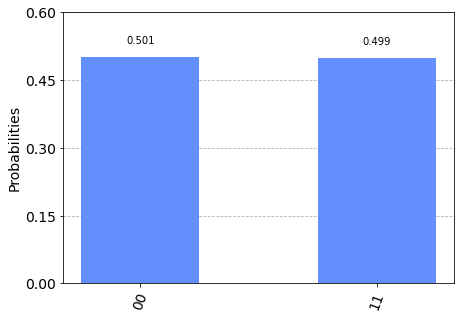

In [37]:
backend = Aer.get_backend('qasm_simulator')
job3=execute(qc3, backend=backend, shots=1024)
result3 = job3.result()
print('Generated histogram:')
plot_histogram(result3.get_counts())

Generated histogram:


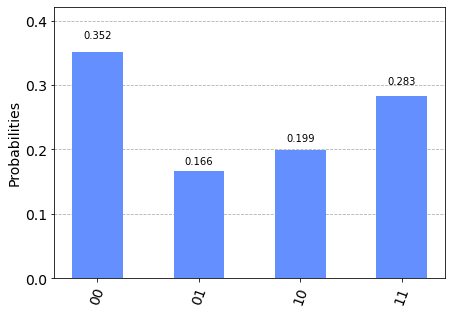

In [38]:
job3=execute(qc3, backend=qi_backend, shots=1024)
result3 = job3.result()
print('Generated histogram:')
plot_histogram(result3.get_counts())